**Data loading and cleaning**

In [ ]:
import pandas as pd

data_path = "INF2178_A3_data.csv"
df = pd.read_csv(data_path)

# Display summary statistics for the dataset
summary_statistics = df.describe()
print(summary_statistics)

# Check for missing values in the dataset
missing_values = df.isnull().sum()
print(missing_values)

       fallreadingscore  fallmathscore  fallgeneralknowledgescore  \
count      11933.000000   11933.000000               11933.000000   
mean          35.954215      27.128244                  23.073694   
std           10.473130       9.120505                   7.396978   
min           21.010000      10.510000                   6.985000   
25%           29.340000      20.680000                  17.385000   
50%           34.060000      25.680000                  22.954000   
75%           39.890000      31.590000                  28.305000   
max          138.510000     115.650000                  47.691000   

       springreadingscore  springmathscore  springgeneralknowledgescore  \
count        11933.000000     11933.000000                 11933.000000   
mean            47.511178        37.799461                    28.235584   
std             14.327111        12.027753                     7.577457   
min             22.350000        11.900000                     7.858000   
25%

**ACNOVA tests assumptions and interaction plots**

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

df['change_in_reading'] = df['springreadingscore'] - df['fallreadingscore']

# ANCOVA model with 'change_in_reading' as the dependent variable, 'incomegroup' as the independent variable,
# and 'fallreadingscore' as the covariate.
model = ols('change_in_reading ~ C(incomegroup) + fallreadingscore', data=df).fit()

ancova_table = sm.stats.anova_lm(model, typ=2)
ancova_table

,sum_sq,df,F,PR(>F)
C(incomegroup),513.120105,2.0,4.055660,1.734793e-02
fallreadingscore,21099.608888,1.0,333.539242,1.629240e-73
Residual,754625.552188,11929.0,NaN,NaN


In [ ]:
# Homogeneity of variances
from scipy.stats import levene
stat, p = levene(df[df['incomegroup'] == 1]['change_in_reading'],
                 df[df['incomegroup'] == 2]['change_in_reading'],
                 df[df['incomegroup'] == 3]['change_in_reading'])
print('Levene’s test p-value:', p)

# Normality of residuals
from scipy.stats import shapiro
shapiro(model.resid)

Levene’s test p-value: 2.794929503613517e-09


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9119972586631775, pvalue=0.0)

In [ ]:
# ANCOVA model for change in math scores
df['change_in_math'] = df['springmathscore'] - df['fallmathscore']
model_math = ols('change_in_math ~ C(incomegroup) + fallmathscore', data=df).fit()
ancova_table_math = sm.stats.anova_lm(model_math, typ=2)
ancova_table_math

,sum_sq,df,F,PR(>F)
C(incomegroup),1712.758286,2.0,18.523585,9.284861e-09
fallmathscore,4806.990621,1.0,103.975792,2.576573e-24
Residual,551499.442116,11929.0,NaN,NaN


In [13]:
# ANCOVA model for change in math scores, using totalhouseholdincome and fallmathscore as independent variables to predict the change in math scores.
model_math = ols('change_in_math ~ totalhouseholdincome + fallmathscore', data=df).fit()
ancova_table_math = sm.stats.anova_lm(model_math, typ=2)
ancova_table_math

,sum_sq,df,F,PR(>F)
totalhouseholdincome,2674.327250,1.0,57.951915,2.888169e-14
fallmathscore,4117.314686,1.0,89.221045,4.183710e-21
Residual,550537.873151,11930.0,NaN,NaN


In [9]:
# Run the ANCOVA model with an interaction term
model_interaction = ols('change_in_reading ~ totalhouseholdincome * fallreadingscore', data=df).fit()

# Get the ANCOVA table including interaction effects
ancova_table_interaction = sm.stats.anova_lm(model_interaction, typ=2)
ancova_table_interaction

,sum_sq,df,F,PR(>F)
totalhouseholdincome,675.957664,1.0,10.688894,1.080860e-03
fallreadingscore,20362.331746,1.0,321.988799,4.575755e-71
totalhouseholdincome:fallreadingscore,81.642813,1.0,1.291015,2.558838e-01
Residual,754381.071816,11929.0,NaN,NaN


In [10]:
# Fit the ANCOVA model with an interaction term between total household income and fall math scores
model = ols('change_in_math ~ totalhouseholdincome * fallmathscore', data=df).fit()

# Get the results
ancova_results = sm.stats.anova_lm(model, typ=2)
ancova_results

,sum_sq,df,F,PR(>F)
totalhouseholdincome,2674.327250,1.0,58.048228,2.750838e-14
fallmathscore,4117.314686,1.0,89.369325,3.883810e-21
totalhouseholdincome:fallmathscore,959.516644,1.0,20.827010,5.077102e-06
Residual,549578.356507,11929.0,NaN,NaN


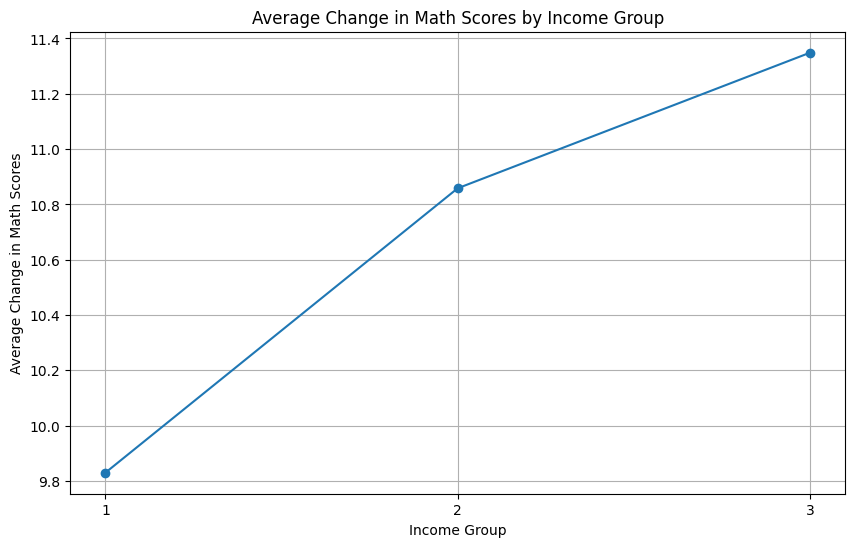

In [ ]:
# Calculate the mean change in math scores for each income group
grouped_math = df.groupby('incomegroup')['change_in_math'].mean().reset_index()

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(grouped_math['incomegroup'], grouped_math['change_in_math'], marker='o', linestyle='-')

plt.title('Average Change in Math Scores by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Average Change in Math Scores')
plt.xticks(grouped_math['incomegroup'], ['1', '2', '3'])
plt.grid(True)
plt.show()

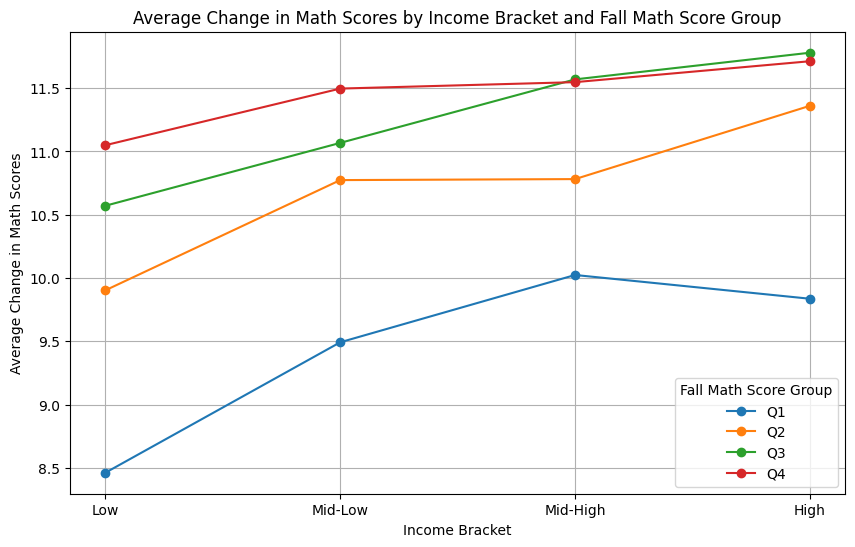

In [ ]:
# Create income brackets
df['income_bracket'] = pd.qcut(df['totalhouseholdincome'], q=4, labels=['Low', 'Mid-Low', 'Mid-High', 'High'])

# Group by income bracket and fall math score group, then calculate mean change in math scores
grouped = df.groupby(['income_bracket', 'fallmathscore_group'])['change_in_math'].mean().reset_index()

# Pivot for plotting
pivot_df = grouped.pivot(index='income_bracket', columns='fallmathscore_group', values='change_in_math')

# Plot
pivot_df.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Average Change in Math Scores by Income Bracket and Fall Math Score Group')
plt.xlabel('Income Bracket')
plt.ylabel('Average Change in Math Scores')
plt.xticks(range(len(pivot_df.index)), pivot_df.index)
plt.legend(title='Fall Math Score Group')
plt.grid(True)
plt.show()

In [ ]:
# ANCOVA model with interaction term
# 'change_in_reading' is calculated as the dependent variable, which represents the difference
model = ols('change_in_reading ~ C(incomegroup) * fallreadingscore', data=df).fit()

# Get the ANCOVA table
ancova_results = sm.stats.anova_lm(model, typ=2)
ancova_results

,sum_sq,df,F,PR(>F)
C(incomegroup),513.120105,2.0,4.060138,1.727047e-02
fallreadingscore,21099.608888,1.0,333.907533,1.361825e-73
C(incomegroup):fallreadingscore,958.712884,2.0,7.585957,5.099814e-04
Residual,753666.839304,11927.0,NaN,NaN


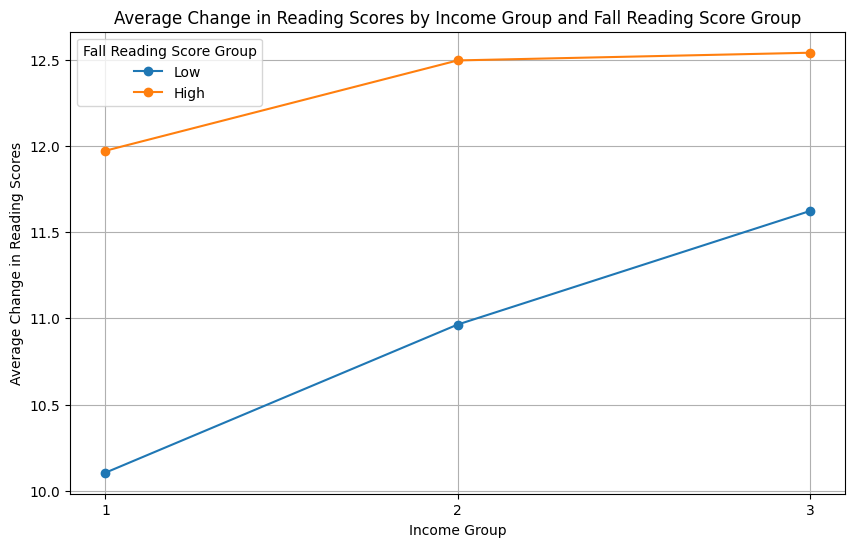

In [ ]:
grouped_reading = df.groupby(['incomegroup', 'fallreadingscore_group'])['change_in_reading'].mean().reset_index()

# Pivot the data for plotting
pivot_reading_df = grouped_reading.pivot(index='incomegroup', columns='fallreadingscore_group', values='change_in_reading')

# Plot the line chart
pivot_reading_df.plot(kind='line', marker='o', figsize=(10, 6))

# Set the x-axis labels to match the income groups
plt.xticks(ticks=[0, 1, 2], labels=['1', '2', '3'])
plt.title('Average Change in Reading Scores by Income Group and Fall Reading Score Group')
plt.xlabel('Income Group')
plt.ylabel('Average Change in Reading Scores')
plt.legend(title='Fall Reading Score Group')
plt.grid(True)

**Exploratory data analysis**

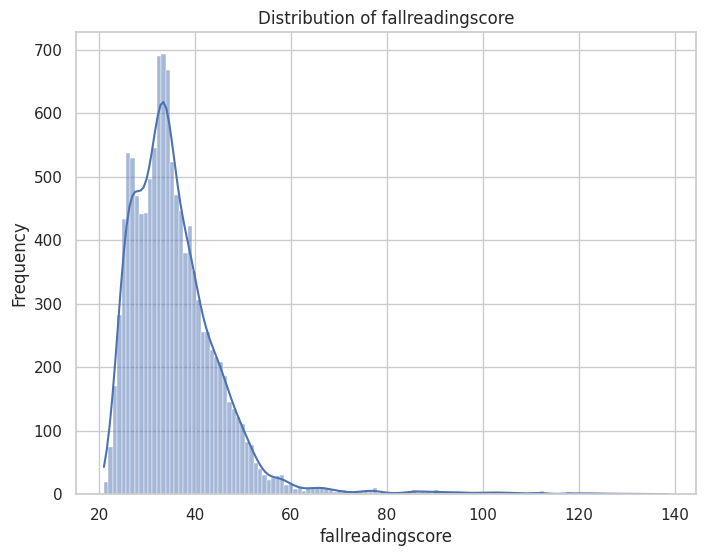

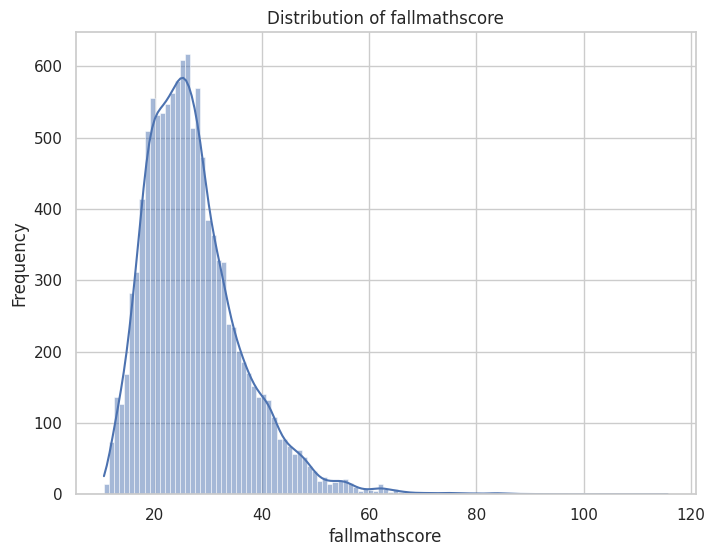

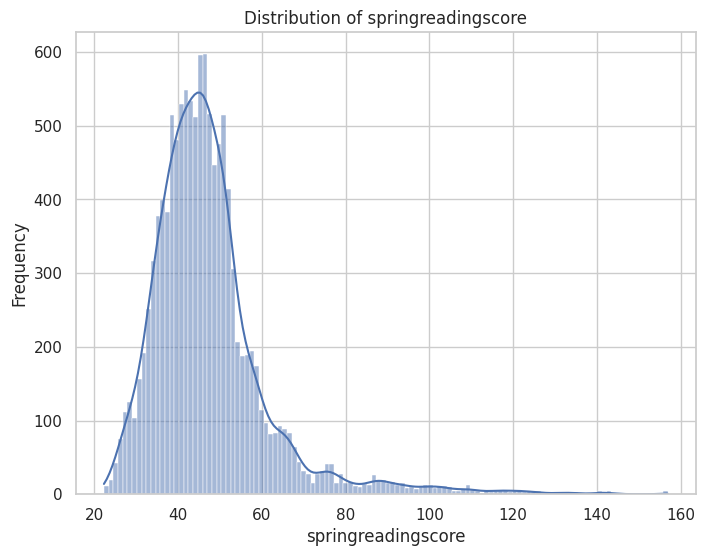

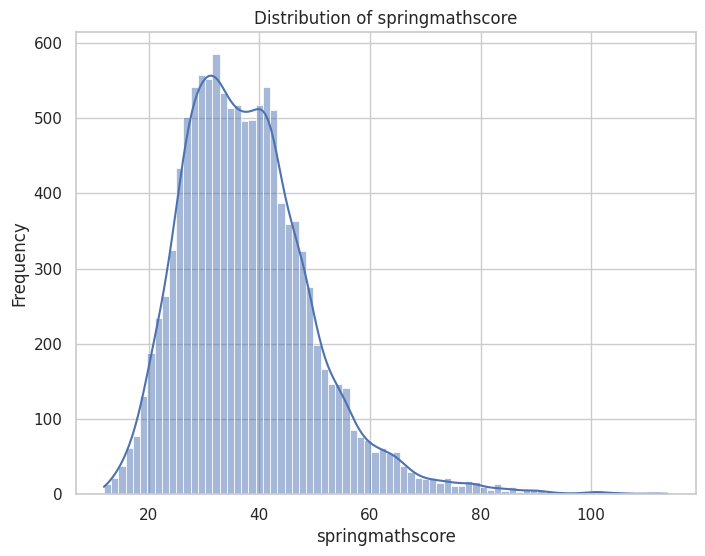

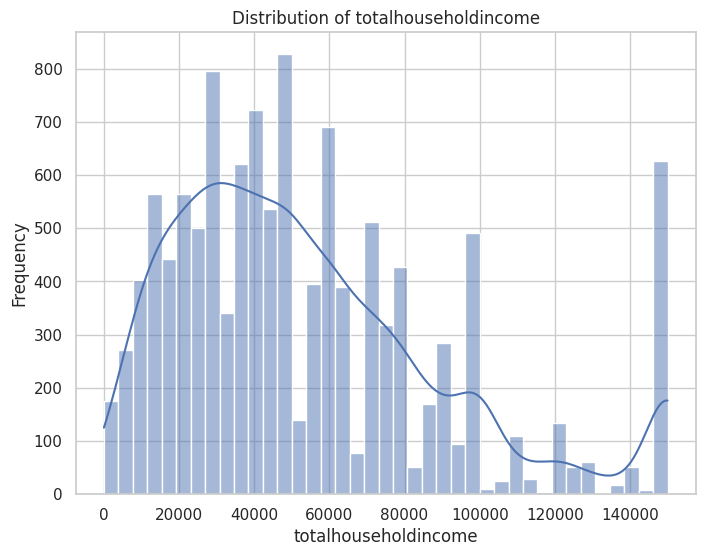

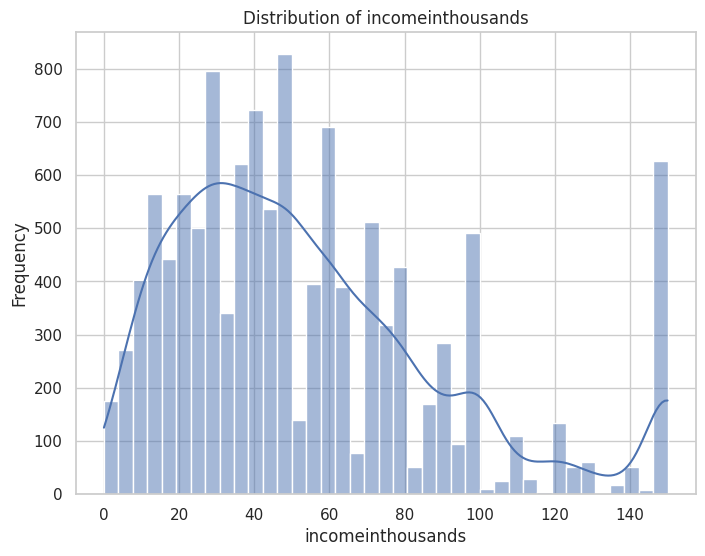

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograms for scores and income
score_columns = ['fallreadingscore', 'fallmathscore', 'springreadingscore', 'springmathscore',]
income_columns = ['totalhouseholdincome', 'incomeinthousands']

for column in score_columns + income_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

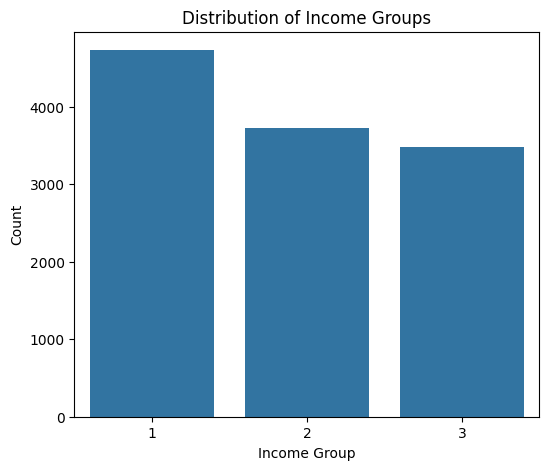

In [ ]:
# Plot for distribution of income groups
plt.figure(figsize=(6, 5))
sns.countplot(x='incomegroup', data=df)
plt.title('Distribution of Income Groups')
plt.xlabel('Income Group')
plt.ylabel('Count')
plt.show()

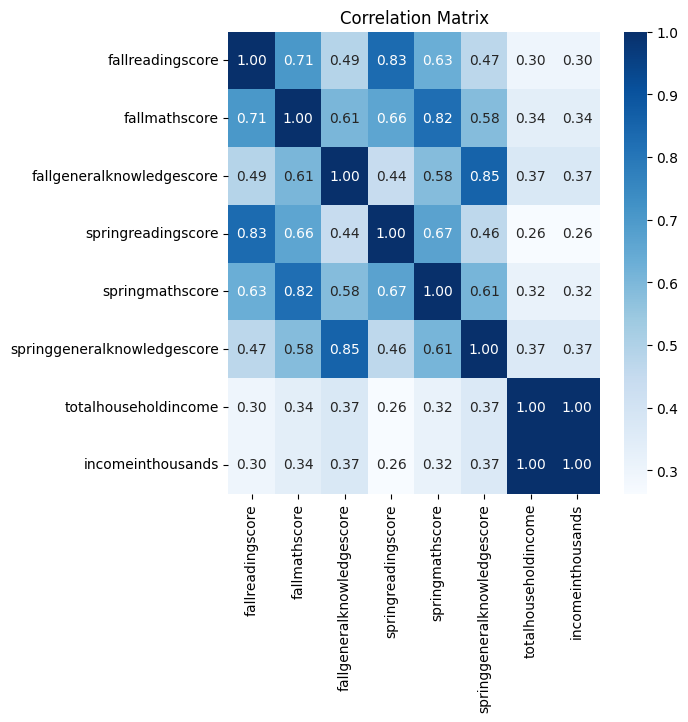

In [ ]:
# Correlation matrix of the scores and income
correlation_matrix = df[score_columns + income_columns].corr()
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

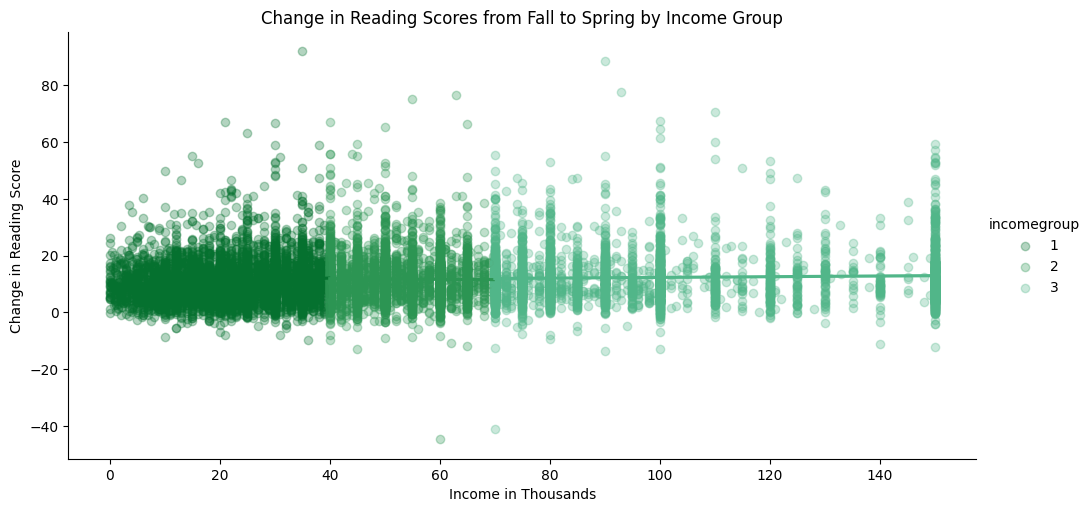

In [ ]:
# Calculate the change in reading scores from fall to spring

green_palette = sns.color_palette("BuGn_r")

sns.lmplot(x='incomeinthousands', y='change_in_reading', data=df, hue='incomegroup', aspect=2,
           palette=green_palette, scatter_kws={'alpha':0.3})
plt.title('Change in Reading Scores from Fall to Spring by Income Group')
plt.xlabel('Income in Thousands')
plt.ylabel('Change in Reading Score')
plt.show()

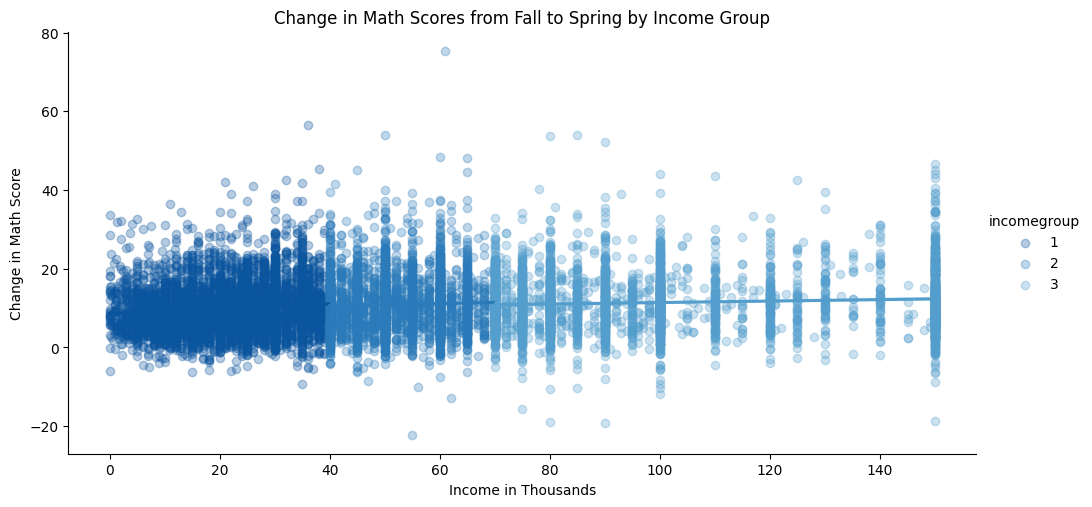

In [12]:
blue_palette = sns.color_palette("Blues_r")

# Create a scatter plot with a linear model fit
sns.lmplot(x='incomeinthousands', y='change_in_math', data=df, hue='incomegroup', aspect=2,
           palette=blue_palette, scatter_kws={'alpha':0.3})
plt.title('Change in Math Scores from Fall to Spring by Income Group')
plt.xlabel('Income in Thousands')
plt.ylabel('Change in Math Score')
plt.show()

In [ ]:
from scipy.stats import shapiro

# Shapiro-Wilk Test for normality
for column in score_columns:
    stat, p = shapiro(df[column].dropna())
    print(f'Normality test for {column}: Statistics={stat:.3f}, p={p:.3f}')
    # Interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Normality test for fallreadingscore: Statistics=0.785, p=0.000
Sample does not look Gaussian (reject H0)
Normality test for fallmathscore: Statistics=0.922, p=0.000
Sample does not look Gaussian (reject H0)
Normality test for fallgeneralknowledgescore: Statistics=0.990, p=0.000
Sample does not look Gaussian (reject H0)
Normality test for springreadingscore: Statistics=0.826, p=0.000
Sample does not look Gaussian (reject H0)
Normality test for springmathscore: Statistics=0.946, p=0.000
Sample does not look Gaussian (reject H0)
Normality test for springgeneralknowledgescore: Statistics=0.993, p=0.000
Sample does not look Gaussian (reject H0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


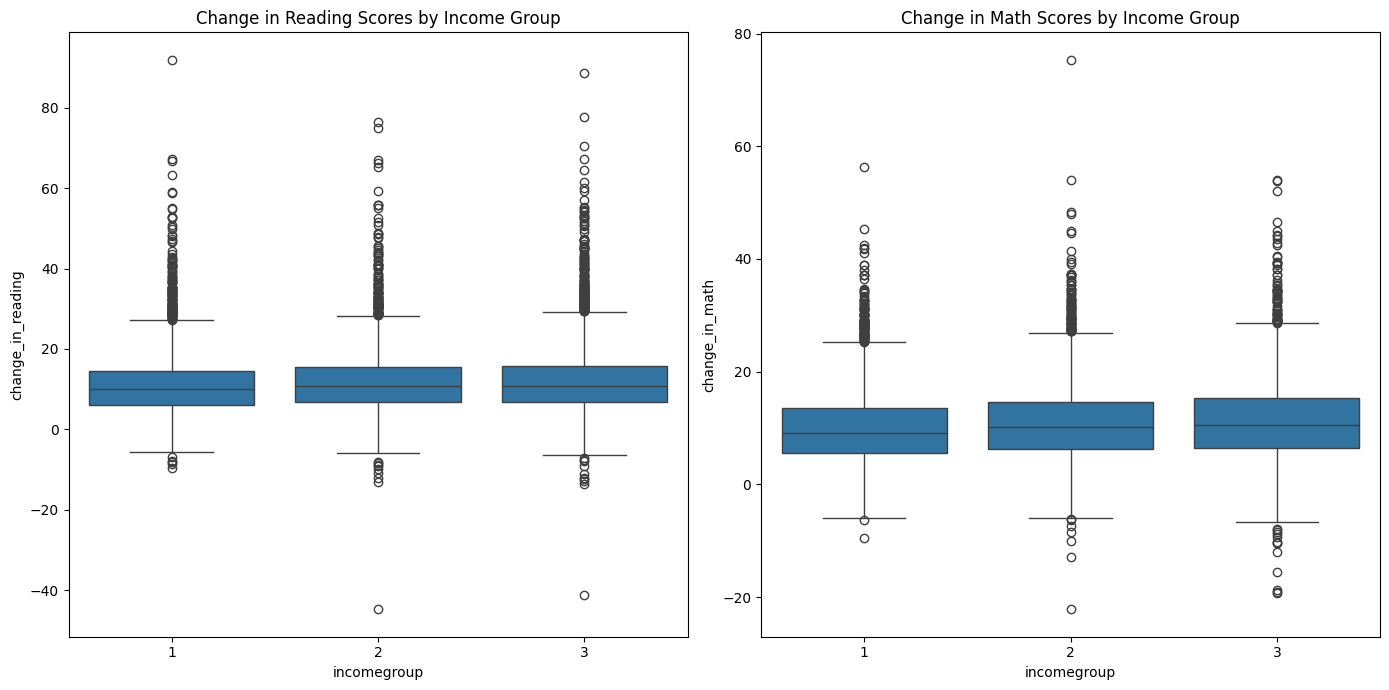

             change_in_reading  change_in_math
incomegroup                                   
1                    10.878279        9.958547
2                    11.716932       10.896224
3                    12.308387       11.399178


In [11]:
import matplotlib.pyplot as plt

# Create visualizations for change in reading and math scores by income group
plt.figure(figsize=(14, 7))

# Change in Reading Scores
plt.subplot(1, 2, 1)
sns.boxplot(x='incomegroup', y='change_in_reading', data=df)
plt.title('Change in Reading Scores by Income Group')

# Change in Math Scores
plt.subplot(1, 2, 2)
sns.boxplot(x='incomegroup', y='change_in_math', data=df)
plt.title('Change in Math Scores by Income Group')

plt.tight_layout()
plt.show()

# Compute average changes
avg_changes_by_income = df.groupby('incomegroup')[['change_in_reading', 'change_in_math']].mean()
print(avg_changes_by_income)